In [1]:
import numpy as np
import pandas as pd

# Reading the data file

In [2]:
df = pd.read_csv("C:/selenium/amazon_scrape.csv")

In [3]:
df.head()

,Name,Ratings,Review
0,Adam,5.0 out of 5 stars,I received the Fire TV Stick 4K on launch day....
1,Vedgehammer,3.0 out of 5 stars,"Let me tell you, I was super excited for the l..."
2,rich,1.0 out of 5 stars,"Our main streaming service is DirecTV Now, and..."
3,Achint,4.0 out of 5 stars,I was looking for replacing my Roku LT streami...
4,Birdman,4.0 out of 5 stars,"Ok, so if your like me you wonder what exactly..."


# Changing the Rating column to integer

In [4]:
# new data frame with split value columns 
new = df["Ratings"].str.split(" ", n = 1, expand = True) 

In [5]:
df["Ratings_id"]= new[0] 

In [6]:
df.head()

,Name,Ratings,Review,Ratings_id
0,Adam,5.0 out of 5 stars,I received the Fire TV Stick 4K on launch day....,5.0
1,Vedgehammer,3.0 out of 5 stars,"Let me tell you, I was super excited for the l...",3.0
2,rich,1.0 out of 5 stars,"Our main streaming service is DirecTV Now, and...",1.0
3,Achint,4.0 out of 5 stars,I was looking for replacing my Roku LT streami...,4.0
4,Birdman,4.0 out of 5 stars,"Ok, so if your like me you wonder what exactly...",4.0


In [7]:
# new data frame with split value columns 
new1 = df["Ratings"].str.split(".", n = 1, expand = True) 

In [8]:
df["Ratings_id"]= new1[0] 

In [9]:
df.head()

,Name,Ratings,Review,Ratings_id
0,Adam,5.0 out of 5 stars,I received the Fire TV Stick 4K on launch day....,5
1,Vedgehammer,3.0 out of 5 stars,"Let me tell you, I was super excited for the l...",3
2,rich,1.0 out of 5 stars,"Our main streaming service is DirecTV Now, and...",1
3,Achint,4.0 out of 5 stars,I was looking for replacing my Roku LT streami...,4
4,Birdman,4.0 out of 5 stars,"Ok, so if your like me you wonder what exactly...",4


In [10]:
rating_id_df = df[['Ratings', 'Ratings_id']].drop_duplicates().sort_values('Ratings_id')
rating_to_id = dict(rating_id_df.values)
id_to_rating = dict(rating_id_df[['Ratings_id', 'Ratings']].values)
df.head()

,Name,Ratings,Review,Ratings_id
0,Adam,5.0 out of 5 stars,I received the Fire TV Stick 4K on launch day....,5
1,Vedgehammer,3.0 out of 5 stars,"Let me tell you, I was super excited for the l...",3
2,rich,1.0 out of 5 stars,"Our main streaming service is DirecTV Now, and...",1
3,Achint,4.0 out of 5 stars,I was looking for replacing my Roku LT streami...,4
4,Birdman,4.0 out of 5 stars,"Ok, so if your like me you wonder what exactly...",4


# Checking the quality of data

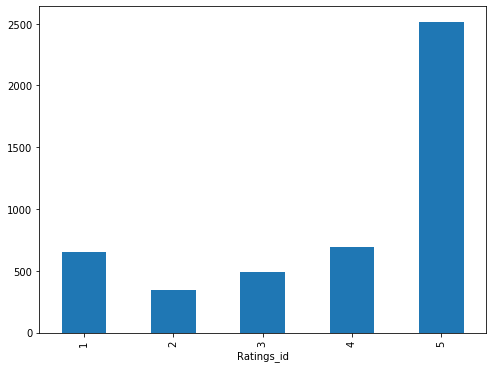

In [12]:
#Imbalanced Classes
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Ratings_id').Review.count().plot.bar(ylim=0)
plt.show()

# Text Pre processing

In [13]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [14]:
def remove_punctuation (text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [15]:
tokenizer = RegexpTokenizer(r'\w+')


In [16]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [25]:
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [18]:
stemmer = PorterStemmer()
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

In [19]:
df['Review'] = df['Review'].apply(lambda x : remove_punctuation(x))
df['Review'].head()

0    I received the Fire TV Stick 4K on launch day ...
1    Let me tell you I was super excited for the la...
2    Our main streaming service is DirecTV Now and ...
3    I was looking for replacing my Roku LT streami...
4    Ok so if your like me you wonder what exactly ...
Name: Review, dtype: object

In [21]:
df['Review'] = df['Review'].apply(lambda x : tokenizer.tokenize(x.lower()))
df['Review'].head()

0    [i, received, the, fire, tv, stick, 4k, on, la...
1    [let, me, tell, you, i, was, super, excited, f...
2    [our, main, streaming, service, is, directv, n...
3    [i, was, looking, for, replacing, my, roku, lt...
4    [ok, so, if, your, like, me, you, wonder, what...
Name: Review, dtype: object

In [23]:
df['Review'] = df['Review'].apply(lambda x : remove_stopwords(x))
df['Review'].head()

0    [received, fire, tv, stick, 4k, launch, day, p...
1    [let, tell, super, excited, launch, new, firet...
2    [main, streaming, service, directv, stick, doe...
3    [looking, replacing, roku, lt, streaming, box,...
4    [ok, like, wonder, exactly, fire, stick, well,...
Name: Review, dtype: object

In [26]:
df['Review'].apply(lambda x : word_lemmatizer(x))

0       [received, fire, tv, stick, 4k, launch, day, p...
1       [let, tell, super, excited, launch, new, firet...
2       [main, streaming, service, directv, stick, doe...
3       [looking, replacing, roku, lt, streaming, box,...
4       [ok, like, wonder, exactly, fire, stick, well,...
                              ...                        
4686    [tired, taken, financial, ride, every, month, ...
4687    [ok, device, free, content, get, subscription,...
4688    [far, love, got, chance, use, feature, yet, st...
4689    [upgraded, original, fire, stick, must, say, h...
4690    [ordered, prime, day, 2, older, version, one, ...
Name: Review, Length: 4691, dtype: object

In [27]:
df['Review'] = df['Review'].apply(lambda x : word_stemmer(x))

In [28]:
df.head()

,Name,Ratings,Review,Ratings_id
0,Adam,5.0 out of 5 stars,receiv fire tv stick 4k launch day previou mod...,5
1,Vedgehammer,3.0 out of 5 stars,let tell super excit launch new firetv stick l...,3
2,rich,1.0 out of 5 stars,main stream servic directv stick doesnt run ri...,1
3,Achint,4.0 out of 5 stars,look replac roku lt stream box releas 100 year...,4
4,Birdman,4.0 out of 5 stars,ok like wonder exactli fire stick well 1st sav...,4


# Text Representation
# The classifiers and learning algorithms can not directly process the text documents in their original form,
# as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length
# for each term in our dataset, we will calculate a measure called Term Frequency, Inverse Document Frequency, 
# abbreviated to tf-idf

In [29]:


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Review).toarray()
labels = df.Ratings_id
features.shape

(4691, 9132)

# We can use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the Review:

In [30]:

from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Ratings, Ratings_id in sorted(rating_to_id.items()):
    features_chi2 = chi2(features, labels == Ratings_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Ratings))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '1.0 out of 5 stars':
  . Most correlated unigrams:
. refund
. return
  . Most correlated bigrams:
. stop work
. wast money
# '2.0 out of 5 stars':
  . Most correlated unigrams:
. restart
. nope
  . Most correlated bigrams:
. day alreadi
. tri plug
# '3.0 out of 5 stars':
  . Most correlated unigrams:
. ok
. annoy
  . Most correlated bigrams:
. mayb amazon
. spectrum app
# '4.0 out of 5 stars':
  . Most correlated unigrams:
. overal
. star
  . Most correlated bigrams:
. initi instal
. gave star
# '5.0 out of 5 stars':
  . Most correlated unigrams:
. love
. return
  . Most correlated bigrams:
. work fine
. highli recommend


# Multi-Class Classifier: Features and Design
# Model 1 :Navie Bayse classifier :the one most suitable for word counts is the multinomial variant
# test_size=0.2, random_state=42

In [31]:


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Ratings'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)



# predicting the ratings

In [33]:
a= "Update: I had to move the fire stick to the living room so that it would be directly by the WiFi box in order for it to work. I had to move the Roku back to my bedroom (where the fire stick initially was) and that still works with ZERO buffering issues. Now, suddenly a month to so later, every single time I try to use the fire stick I get a message on the screen that says, â€œHome is Currently Unavailable. We are unable to connect to Amazon services. Please check your internet connection or try again laterâ€. I then click the â€œgo to network settings linkâ€ and it shows that I am connected and that the signal is great. Yet, I still canâ€™t use the freaking fire stick. It has been 4 days and it still keeps saying that it cannot connect. Even though our phones, tablets, TVs, laptops, DVD players, Xboxes, and PlayStations are connecting fine, I rebooted the WiFi. Iâ€™ve tried disconnecting and reconnecting the fire stick to the WiFi. Iâ€™ve tried everything. I have always been a roku owner. I finally decided to give the fire stick a try and I regret it. I like the setup of the fire stick, but itâ€™s pointless when I canâ€™t even use it. Iâ€™d give it zero stars if I had the option to do so. Iâ€™m sending it back."


In [34]:
#predicting 
print(clf.predict(count_vect.transform([a])))

['5.0 out of 5 stars']


# checking the accuracy

In [35]:
from sklearn.model_selection import cross_val_score
CV = 5
model = MultinomialNB()
cv_df = pd.DataFrame()
entries = []
model_name = model.__class__.__name__
accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

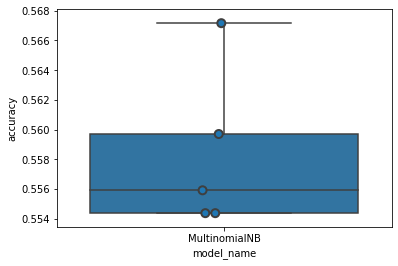

In [36]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [37]:
cv_df.groupby('model_name').accuracy.mean()

model_name
MultinomialNB    0.558304
Name: accuracy, dtype: float64

# model evaluation

In [38]:

model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

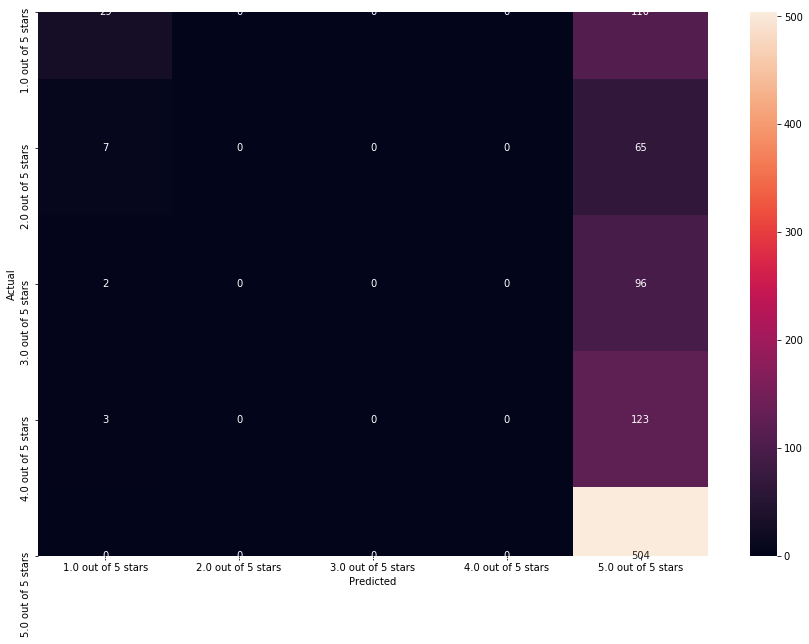

In [39]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=rating_id_df.Ratings.values, yticklabels=rating_id_df.Ratings.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [40]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Ratings'].unique()))

                    precision    recall  f1-score   support

5.0 out of 5 stars       0.71      0.21      0.32       139
3.0 out of 5 stars       0.00      0.00      0.00        72
1.0 out of 5 stars       0.00      0.00      0.00        98
4.0 out of 5 stars       0.00      0.00      0.00       126
2.0 out of 5 stars       0.56      1.00      0.72       504

          accuracy                           0.57       939
         macro avg       0.25      0.24      0.21       939
      weighted avg       0.41      0.57      0.43       939



C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# sampling as the data is uneven

In [41]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.2, random_state=0)
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [42]:
smote = model.fit(X_train, y_train)
y_pred = smote.predict(X_test)

# checking the accuracy 

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.582534611288605

In [44]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Ratings'].unique()))

                    precision    recall  f1-score   support

5.0 out of 5 stars       0.50      0.59      0.54       139
3.0 out of 5 stars       0.21      0.21      0.21        72
1.0 out of 5 stars       0.25      0.27      0.25        98
4.0 out of 5 stars       0.27      0.29      0.28       126
2.0 out of 5 stars       0.85      0.77      0.81       504

          accuracy                           0.58       939
         macro avg       0.41      0.43      0.42       939
      weighted avg       0.61      0.58      0.59       939



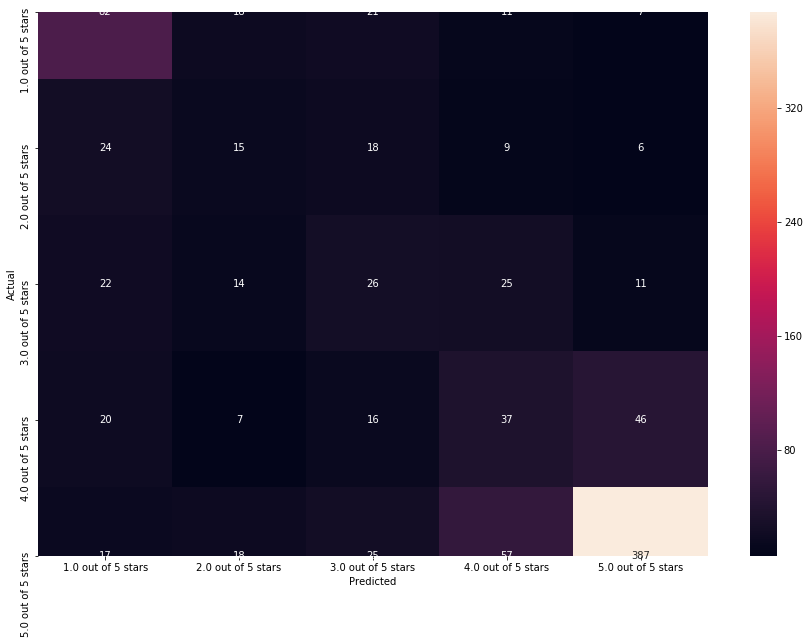

In [45]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=rating_id_df.Ratings.values, yticklabels=rating_id_df.Ratings.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# We can observe that the accuracy increased after sampling the data using smote to 58% from 56% 

# Furture if we want to improve the accuracy we need to work on the pre processing of the text data -

# eg . removing the Stopwords,Lemmatize ,etc